384149.529464063 float64
[2.04072023e-03 3.19787272e-01 4.97040420e-01 7.04809445e-01
 2.29920143e+00]


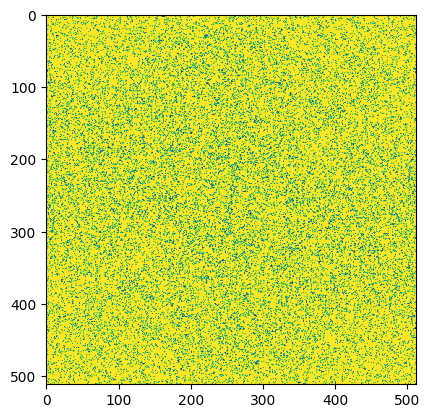

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

src = cv.imread('../data/flower.jpg').astype(float) - 127
wm = cv.imread('../data/wm_gray.png', cv.IMREAD_GRAYSCALE).astype(float)
wm[wm <= 127] = 0
wm[wm > 127] = 100000000
freq = np.fft.fftn(src, axes=(0,1), norm='ortho')

wm_field = np.zeros((256, 256))
wm_field[:wm.shape[0], :wm.shape[1]] = wm
conj, hf, vf = np.flip(wm_field), np.flip(wm_field, axis=1), np.flip(wm_field, axis=0)
data = np.zeros((512, 512))
data = np.array([wm_field, hf, vf, conj]).reshape(2, 2, 256, 256).swapaxes(1, 2).reshape(512, 512)

s = np.array(freq.shape[:2])
p = s//2 - np.divide(data.shape, 2).astype(int)
freq[p[0]:p[0]+data.shape[0], p[1]:p[1]+data.shape[1], 0] += data
# freq[p[0]:p[0]+data.shape[0], p[1]:p[1]+data.shape[1], 1] += data
# freq[p[0]:p[0]+data.shape[0], p[1]:p[1]+data.shape[1], 2] += data
# plt.imshow(np.abs(freq))

dst = np.fft.ifftn(freq, axes=(0,1), norm='ortho').real
print(np.abs(dst-src).mean(), dst.dtype)
cv.imwrite('../data/dst.jpg', np.round(dst+127), [cv.IMWRITE_JPEG_QUALITY, 80])
dst = cv.imread('../data/dst.jpg')


freq2 = np.fft.fftn(src, axes=(0,1), norm='ortho')
data2 = freq2[p[0]:p[0]+data.shape[0], p[1]:p[1]+data.shape[1], 0]
print(np.percentile(np.abs(data2), (0, 25, 50, 75, 100)))
img = np.abs(data2)
img[img < 0.2] = 0
img[img > 0.2] = 1
plt.imshow(img)

(500, 500)


True

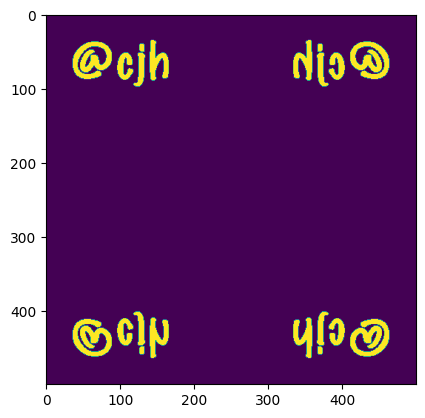